In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("facade_dealer.csv")

In [4]:
print(data.shape)


(48, 10)


In [5]:
print(data.describe())

       Price(/sq mtr)  Lead time(in days)     Rating  \
count       48.000000           48.000000  48.000000   
mean        58.124063           20.687500   3.812500   
std         58.914725           12.963379   1.552709   
min          5.000000            0.000000   0.000000   
25%         14.000000           13.000000   3.000000   
50%         35.000000           17.000000   4.000000   
75%         81.625000           30.000000   5.000000   
max        210.000000           50.000000   6.000000   

       Address and website avaiable  Response  Time(in hrs)  Response Rate  \
count                     48.000000               48.000000      48.000000   
mean                       0.916667               25.229167       2.145833   
std                        0.279310               20.858428       1.237526   
min                        0.000000                0.000000       0.000000   
25%                        1.000000               12.000000       2.000000   
50%                        

In [6]:
array = data.values
X = np.array(data.drop(['Supplier/vendor'],1))
y = np.array(data['Supplier/vendor'])
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
seed = 7
scoring = 'accuracy'

In [7]:
n_vendors = len(data.index)
n_greater_3 = len(data[data['Rating']>3].index)
n_at_most_3 = n_vendors-n_greater_3

print("Total number of vendors: {}".format(n_vendors))
print("Vendors having rating more than 3: {}".format(n_greater_3))
print("Vendors having rating at most 3: {}".format(n_at_most_3))


Total number of vendors: 48
Vendors having rating more than 3: 29
Vendors having rating at most 3: 19


DATASET

The dataset was obtained from websites like Alibaba.com and globalresources.com. 
The dataset consists of following information
•	Vendor name: Name of the vendor selling the product.
•	Price: The price at which product is being sold(per square meter)
•	Delivery Time: Number of days in which delivery can be expected.
•	Rating: Rating of the Vendor (out of 6).
•	Vendor has an address and a website: Takes values 0 for NO and 1 for YES. It is mandatory for all vendors to have a website and an address.
•	Response Time: Average time a vendor takes to respond to clients.
•	Response Rate: How likely is it for the vendor to respond to the concerns of the client? This can take values 1 for Low, 2 for Medium and 3 for High.
•	Employee Strength: Average number of employees working under the vendor.
•	Annual Revenue: Annual revenue of the vendor in million
•	Minimum order: Minimum quantity for order to be placed

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
import time
X = np.array(data.drop(['Supplier/vendor'],1))
y = np.array(data['Supplier/vendor'])
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.4,random_state = 0)
start_time = time.clock()
clf_gini = DecisionTreeClassifier(random_state = 1).fit(X_train, y_train)
end_time = time.clock()
time_taken = end_time - start_time
print ('The time taken for data processing: {:.2f}sec'.format(time_taken))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf_gini.score(X_test, y_test))) 


The time taken for data processing: 0.00sec
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.00


C:\Users\shailza\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


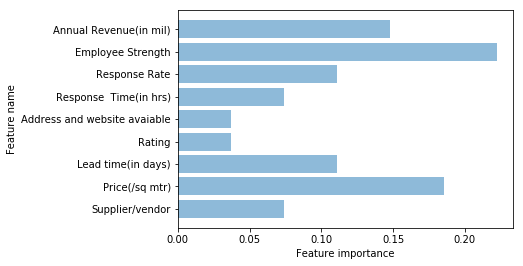

In [9]:
feature = list(zip(map(lambda x: round(x, 4), clf_gini.feature_importances_), data))

imp_names = []
imp_values = []
for i in feature:
    if i[0] != 0.0:
        imp_names.append(i[1])
        imp_values.append(i[0])
    else:
        pass    
length = np.arange(len(imp_names))
plt.barh(length, imp_values, align='center', alpha=0.5)
plt.yticks(length, imp_names)
plt.ylabel('Feature name')
plt.xlabel('Feature importance')
plt.show()

Now we know that most important featureset are these:
1) Address and website available
2) Response Rate
3) Employee Strength
4) Price
5) Annual Revenue

As per problem statement we know that feature 1: having an address and a website is a mandatory feature:
1)Address and website available: must be 1( or a yes)
2) Response rate: Must be 2( or high)
3) Employee strength: Desired to be more
4) Price : price

In [10]:
data.describe()


,Price(/sq mtr),Lead time(in days),Rating,Address and website avaiable,Response Time(in hrs),Response Rate,Employee Strength,Annual Revenue(in mil),Min order
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000
mean,58.124063,20.687500,3.812500,0.916667,25.229167,2.145833,206.37500,21.486458,640.354167
std,58.914725,12.963379,1.552709,0.279310,20.858428,1.237526,288.89832,35.145519,2869.468558
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,14.000000,13.000000,3.000000,1.000000,12.000000,2.000000,75.00000,1.500000,10.000000
50%,35.000000,17.000000,4.000000,1.000000,12.000000,3.000000,107.50000,3.750000,100.000000
75%,81.625000,30.000000,5.000000,1.000000,36.000000,3.000000,156.25000,17.250000,350.000000
max,210.000000,50.000000,6.000000,1.000000,75.000000,3.000000,1550.00000,100.000000,20000.000000


In [15]:
reward=[]
for i in range(48):
  reward.append(X[i][3]*((0.18*X[i][0])+(0.11*X[i][1])+(0.03*X[i][2])+(0.075 * X[i][4])-(0.12*X[i][5])-(0.23*X[i][6])-(0.14*X[i][7])))
print(reward)  
   


[2.725000000000001, -12.121799999999999, -11.642, -6.89, -15.673, -5.247999999999998, 0.0, -37.37, -13.562999999999999, -29.725, -20.235, -9.55, 0.0, -95.03, 4.649999999999999, -13.02, -50.61, 7.789999999999996, -26.88, 0.0, 15.715000000000003, -1.2500000000000018, -354.09999999999997, -31.448, -15.9312, 30.610000000000007, -11.912, -11.984, -12.038, 6.999999999999993, -38.88, -9.015, -33.15, -27.43, -22.501100000000005, -92.26, -80.30999999999999, -12.092, -73.39, -101.14, -11.822000000000001, -22.509999999999998, -0.0, -208.255, -189.775, -36.18, -77.11, -10.740000000000002]


In [16]:
ind = np.argpartition(reward, -10)[-10:]
print(ind)

[42  6 19 12  0 29 17 20 25 14]


In [17]:
for j in range(len(ind)):
    print(y[ind[j]])

Taian Zhuoyue Laser Ltd.
Foshan GF Curtain Wall Co., Ltd.
Guangzhou Apro Building Material Co., Ltd.
Foshan Sunmei Composite Materials Co., Ltd.
Anping County Huihao Hardware Mesh Product Co., Ltd.
Jiangsu Jingtai Glass Co., Ltd
Guangxi Fumeiyao Energy-Saving Windows & Doors Co., Ltd.
Guangzhou Wega Building Decoration Engineering Co., Ltd.
Hwarrior Curtain Wall Engineering (Guangzhou) Co., Ltd.
Foshan Yigo Hardware Limited
